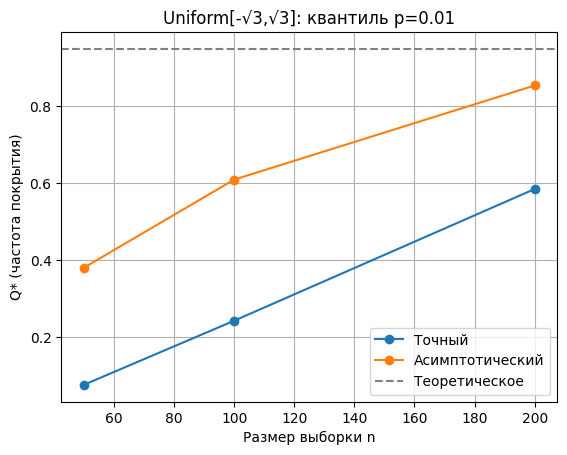

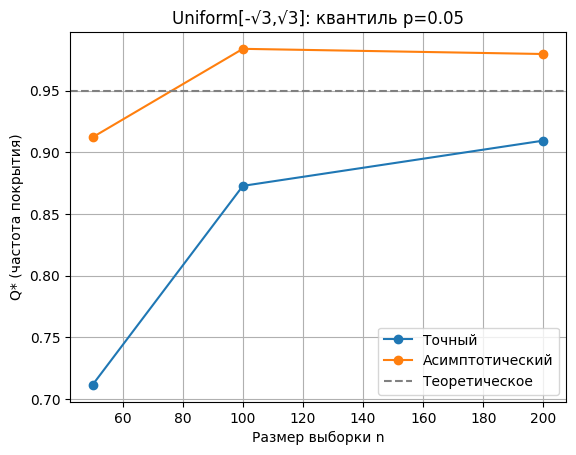

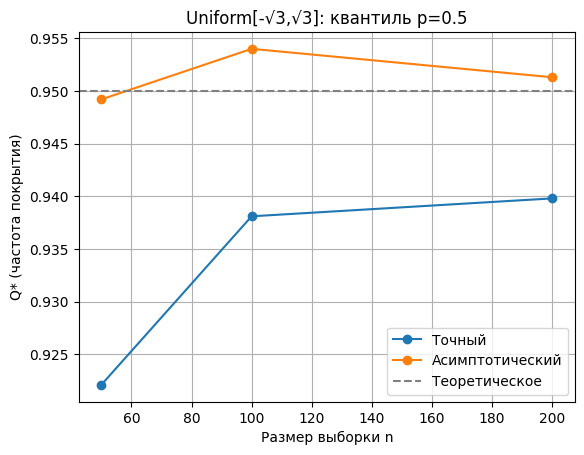

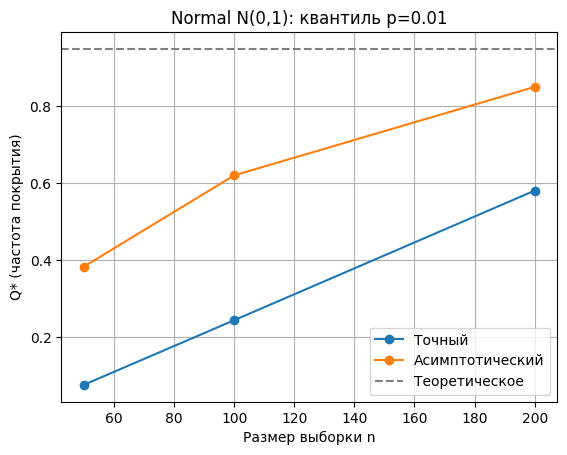

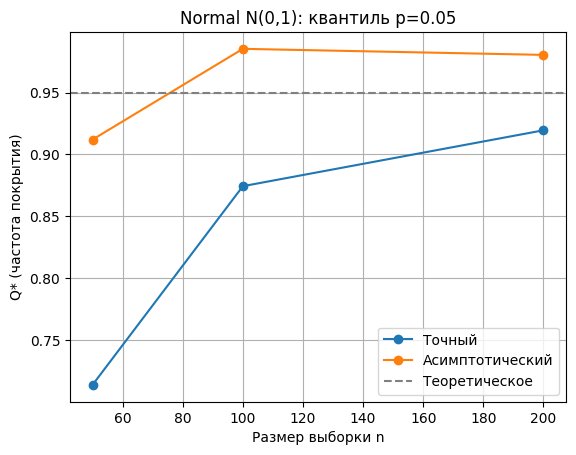

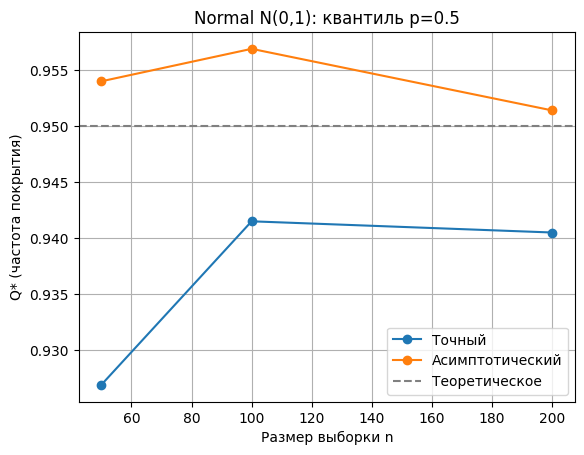

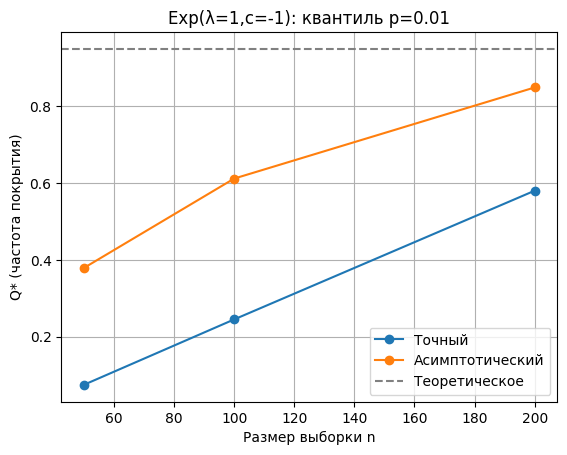

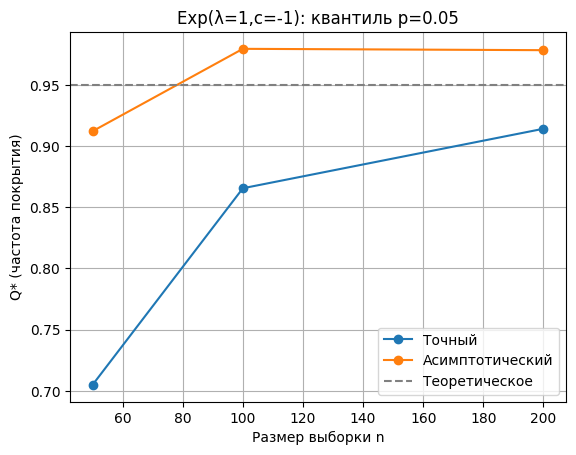

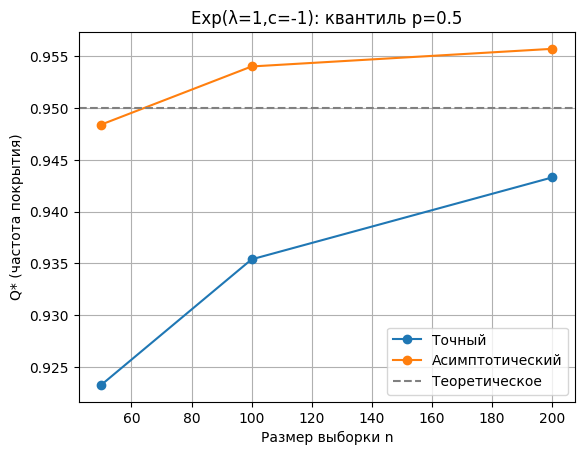

       distribution     p    n  Q*_exact  Q*_asympt
0   Uniform[-√3,√3]  0.01   50    0.0750     0.3799
1   Uniform[-√3,√3]  0.01  100    0.2419     0.6094
2   Uniform[-√3,√3]  0.01  200    0.5850     0.8546
3   Uniform[-√3,√3]  0.05   50    0.7114     0.9121
4   Uniform[-√3,√3]  0.05  100    0.8727     0.9838
5   Uniform[-√3,√3]  0.05  200    0.9094     0.9796
6   Uniform[-√3,√3]  0.50   50    0.9221     0.9492
7   Uniform[-√3,√3]  0.50  100    0.9381     0.9540
8   Uniform[-√3,√3]  0.50  200    0.9398     0.9513
9     Normal N(0,1)  0.01   50    0.0747     0.3825
10    Normal N(0,1)  0.01  100    0.2430     0.6203
11    Normal N(0,1)  0.01  200    0.5807     0.8509
12    Normal N(0,1)  0.05   50    0.7136     0.9120
13    Normal N(0,1)  0.05  100    0.8743     0.9854
14    Normal N(0,1)  0.05  200    0.9195     0.9805
15    Normal N(0,1)  0.50   50    0.9269     0.9540
16    Normal N(0,1)  0.50  100    0.9415     0.9569
17    Normal N(0,1)  0.50  200    0.9405     0.9514
18    Exp(λ=

In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binom, norm

rng = np.random.default_rng(42)
N_trials = 10000
Q = 0.95
n_list = [50, 100, 200]
quantiles = [0.01, 0.05, 0.5]

def gen_uniform(n):
    a, b = -math.sqrt(3), math.sqrt(3)
    return rng.uniform(a, b, size=n), a, b

def gen_normal(n):
    return rng.normal(0, 1, size=n), 0, 1

def gen_shifted_exp(n):
    lam, c = 1.0, -1.0
    return rng.exponential(scale=1/lam, size=n) + c, c, lam

distributions = {
    "Uniform[-√3,√3]": gen_uniform,
    "Normal N(0,1)": gen_normal,
    "Exp(λ=1,c=-1)": gen_shifted_exp,
}

def ci_quantile_exact(x, Q, p):
    n = len(x)
    k1 = int(binom.ppf((1 - Q) / 2, n, p)) + 1
    k2 = int(binom.ppf((1 + Q) / 2, n, p))
    x_sorted = np.sort(x)
    k1 = max(0, min(k1, n - 1))
    k2 = max(0, min(k2, n - 1))
    return x_sorted[k1], x_sorted[k2]

def ci_quantile_asymptotic(x, Q, p):
    n = len(x)
    z = norm.ppf((1 + Q) / 2)
    k1 = int(np.floor(n * p - np.sqrt(n * p * (1 - p)) * z))
    k2 = int(np.floor(n * p + np.sqrt(n * p * (1 - p)) * z)) + 1
    x_sorted = np.sort(x)
    k1 = max(0, min(k1, n - 1))
    k2 = max(0, min(k2, n - 1))
    return x_sorted[k1], x_sorted[k2]


def true_quantile(dist_name, p, a=None, b=None, lam=None):
    if "Uniform" in dist_name:
        return a + (b - a) * p
    elif "Normal" in dist_name:
        return norm.ppf(p, loc=0, scale=1)
    elif "Exp" in dist_name:
        return -math.log(1 - p) / lam + a
    else:
        raise ValueError("Unknown distribution")


rows = []
for dist_name, gen in distributions.items():
    for p in quantiles:
        cover_exact, cover_asym = [], []
        for n in n_list:
            c_ex = c_as = 0
            for _ in range(N_trials):
                x, a, b_or_lam = gen(n)
                if "Exp" in dist_name:
                    lam, c = b_or_lam, a
                    q_true = true_quantile(dist_name, p, a=c, lam=lam)
                else:
                    q_true = true_quantile(dist_name, p, a=a, b=b_or_lam)

                L1, U1 = ci_quantile_exact(x, Q, p)
                L2, U2 = ci_quantile_asymptotic(x, Q, p)
                c_ex += (L1 <= q_true <= U1)
                c_as += (L2 <= q_true <= U2)

            cover_exact.append(c_ex / N_trials)
            cover_asym.append(c_as / N_trials)

            rows.append({
                "distribution": dist_name,
                "p": p,
                "n": n,
                "Q*_exact": c_ex / N_trials,
                "Q*_asympt": c_as / N_trials
            })

        plt.figure()
        plt.plot(n_list, cover_exact, marker='o', label='Точный')
        plt.plot(n_list, cover_asym, marker='o', label='Асимптотический')
        plt.axhline(Q, linestyle='--', color='gray', label='Теоретическое')
        plt.title(f"{dist_name}: квантиль p={p}")
        plt.xlabel("Размер выборки n")
        plt.ylabel("Q* (частота покрытия)")
        plt.legend()
        plt.grid(True)
        plt.show()

df = pd.DataFrame(rows)
print(df)


Домашнее задание

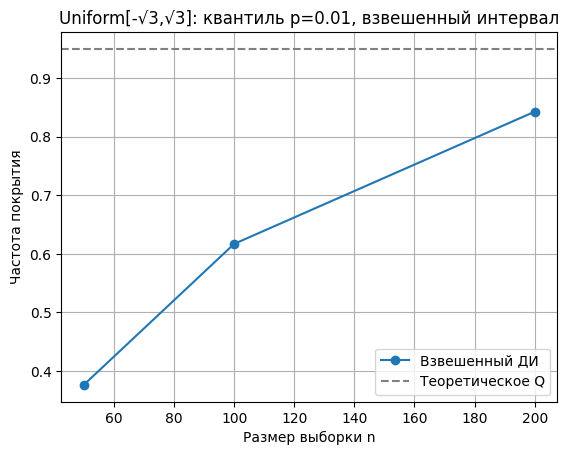

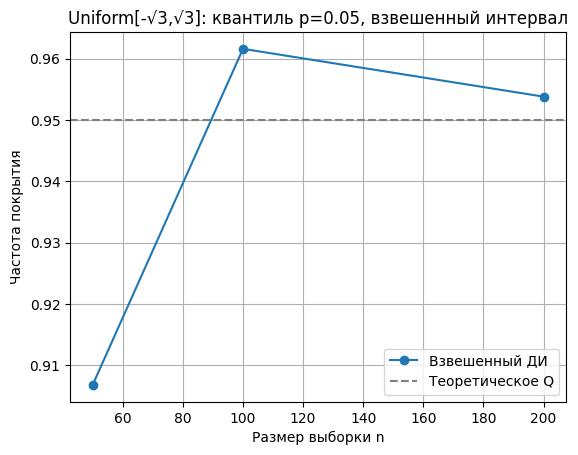

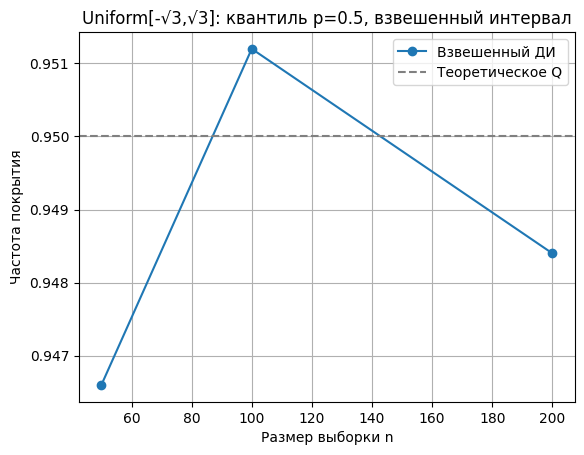

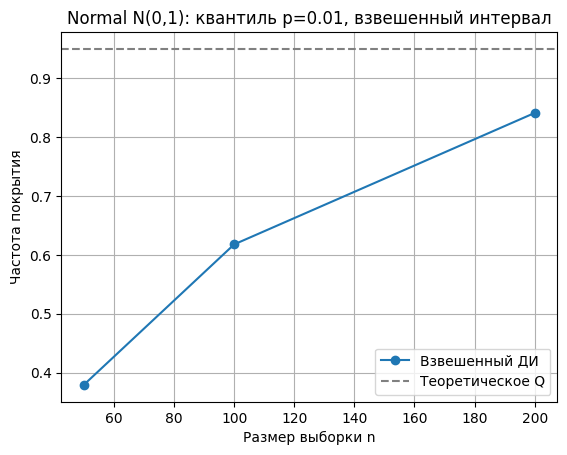

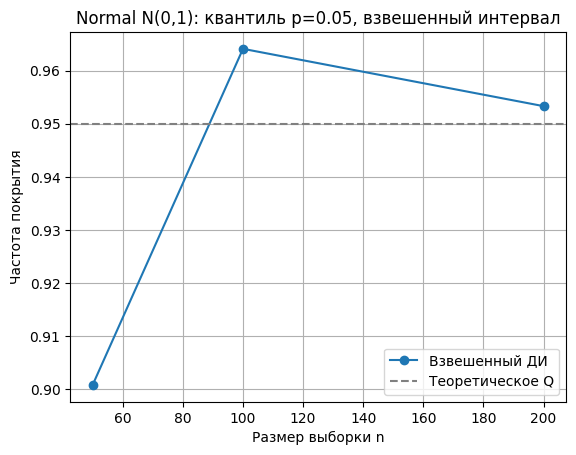

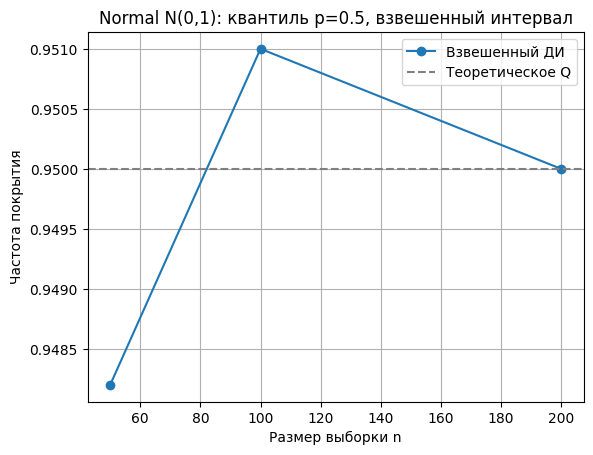

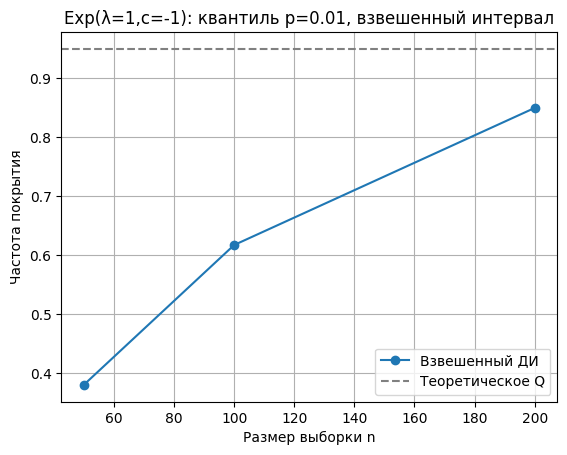

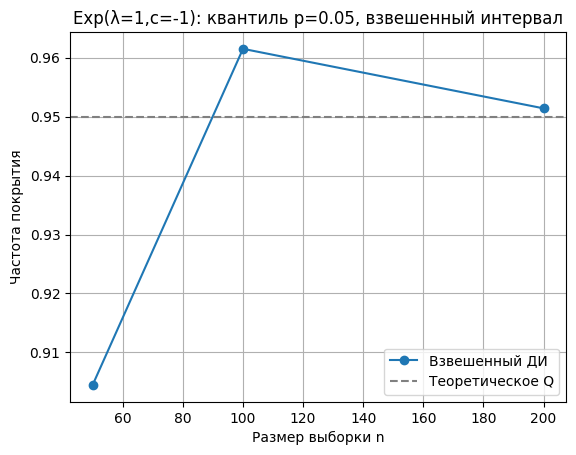

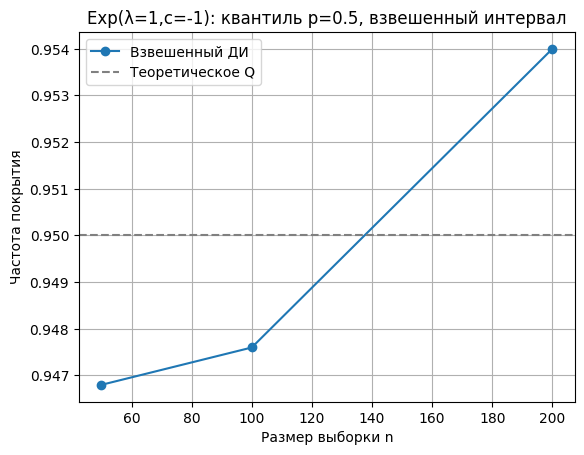


Результаты
       distribution     p    n  Q*_weighted
0   Uniform[-√3,√3]  0.01   50       0.3763
1   Uniform[-√3,√3]  0.01  100       0.6169
2   Uniform[-√3,√3]  0.01  200       0.8427
3   Uniform[-√3,√3]  0.05   50       0.9068
4   Uniform[-√3,√3]  0.05  100       0.9616
5   Uniform[-√3,√3]  0.05  200       0.9538
6   Uniform[-√3,√3]  0.50   50       0.9466
7   Uniform[-√3,√3]  0.50  100       0.9512
8   Uniform[-√3,√3]  0.50  200       0.9484
9     Normal N(0,1)  0.01   50       0.3791
10    Normal N(0,1)  0.01  100       0.6177
11    Normal N(0,1)  0.01  200       0.8411
12    Normal N(0,1)  0.05   50       0.9008
13    Normal N(0,1)  0.05  100       0.9641
14    Normal N(0,1)  0.05  200       0.9533
15    Normal N(0,1)  0.50   50       0.9482
16    Normal N(0,1)  0.50  100       0.9510
17    Normal N(0,1)  0.50  200       0.9500
18    Exp(λ=1,c=-1)  0.01   50       0.3802
19    Exp(λ=1,c=-1)  0.01  100       0.6173
20    Exp(λ=1,c=-1)  0.01  200       0.8498
21    Exp(λ=1,c=-1) 

In [ ]:
def weighted_order_stat(xs_sorted, k_float):
    n = len(xs_sorted)
    if k_float <= 0:
        return xs_sorted[0]
    if k_float >= n - 1:
        return xs_sorted[-1]

    i = int(np.floor(k_float))
    w = k_float - i
    return (1 - w) * xs_sorted[i] + w * xs_sorted[i + 1]


def ci_quantile_weighted(x, Q, p):
    n = len(x)
    z = norm.ppf((1 + Q) / 2)

    center = n * p
    s = math.sqrt(n * p * (1 - p))
    k1 = center - s * z
    k2 = center + s * z

    k1 = max(0.0, min(k1, n - 1.0))
    k2 = max(0.0, min(k2, n - 1.0))

    xs = np.sort(x)
    L = weighted_order_stat(xs, k1)
    U = weighted_order_stat(xs, k2)
    return L, U


rows_dz = []

for dist_name, gen in distributions.items():
    for p in quantiles:
        cover_weighted = []

        for n in n_list:
            c_w = 0
            for _ in range(N_trials):
                x, a, b_or_lam = gen(n)
                if "Exp" in dist_name:
                    lam, c = b_or_lam, a
                    q_true = true_quantile(dist_name, p, a=c, lam=lam)
                else:
                    q_true = true_quantile(dist_name, p, a=a, b=b_or_lam)

                Lw, Uw = ci_quantile_weighted(x, Q, p)
                if Lw <= q_true <= Uw:
                    c_w += 1

            qstar_w = c_w / N_trials
            cover_weighted.append(qstar_w)

            rows_dz.append({
                "distribution": dist_name,
                "p": p,
                "n": n,
                "Q*_weighted": qstar_w
            })

        plt.figure()
        plt.plot(n_list, cover_weighted, marker='o', label='Взвешенный ДИ')
        plt.axhline(Q, linestyle='--', color='gray', label='Теоретическое Q')
        plt.title(f"{dist_name}: квантиль p={p}, взвешенный интервал")
        plt.xlabel("Размер выборки n")
        plt.ylabel("Частота покрытия")
        plt.legend()
        plt.grid(True)
        plt.show()

df_dz = pd.DataFrame(rows_dz)
print("\nРезультаты")
print(df_dz)

Для крайних квантилей (p = 0.01) при малых n взвешенный интервал не достигает требуемого уровня доверия, но с ростом n частота покрытия быстро растёт и приближается к Q.
Для p = 0.05 уже при n = 100 и 200 покрытие близко к требуемому уровню.
Для медианы (p = 0.5) интервал работает стабильно хорошо уже при n = 50 и почти не зависит от распределения.